In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
from scipy.stats import norm
from scipy.stats import ttest_ind

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, kstest

from scipy.stats import levene

In [13]:
# # test for - 
# > nomality
# > variance

# Height and Weight

In [14]:
df_hw = pd.read_csv("weight-height.csv")

In [15]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [16]:
df_hw.shape

(10000, 3)

In [18]:
height = df_hw["Height"]

<AxesSubplot:xlabel='Height', ylabel='Count'>

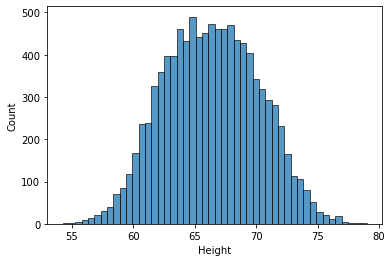

In [19]:
sns.histplot(height)

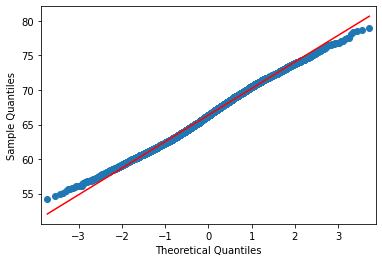

In [21]:
qqplot(height, line = "s")
plt.show()

## Shapiro

In [27]:
# Shapiro is best in the 50 to 200 range 
height_subset = height.sample(100)

In [29]:
# H0 : Data is Gaussian
# HA : Data is not Gaussian
test_stat, p_value = shapiro(height_subset)

print(p_value)


if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

0.3116510808467865
Fail to reject H0
Data is Gaussian


In [32]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian

mu = height_subset.mean()
sigma = height_subset.std()

test_stat, p_value = kstest(
    height_subset,
    norm.cdf,
    args = (mu, sigma)
)

print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

0.7803655662936811
Fail to reject H0
Data is Gaussian


## Leven's

<AxesSubplot:xlabel='Height', ylabel='Count'>

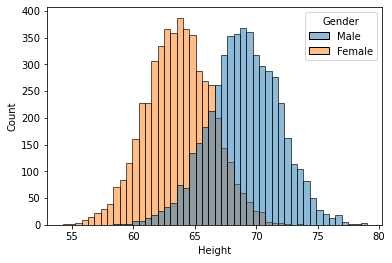

In [34]:
sns.histplot(data=df_hw, x="Height", hue="Gender")

In [35]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [36]:
height_men.mean()

69.02634590621737

In [37]:
height_women.mean()

63.708773603424916

In [38]:
# H0 : same mean height
# HA : diff

ttest_ind(height_men, height_women)

Ttest_indResult(statistic=95.60271449148823, pvalue=0.0)

In [39]:
height_men.var()

8.19884325252049

In [40]:
height_women.var()

7.269947493670132

In [41]:
# H0: same variance
# Ha: variance is different

test_stat, p_value = levene(height_men, height_women)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Variances are different")
else:
    print("Fail to reject H0")
    print("Variances are the same")

0.0004586349895436178
Reject H0
Variances are different


In [ ]:
## Assumptions of ANOVA
- normality
- equal variance

# Waiting time

In [22]:
df_wt = pd.read_csv("waiting_time.csv")

In [23]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<AxesSubplot:xlabel='time', ylabel='Count'>

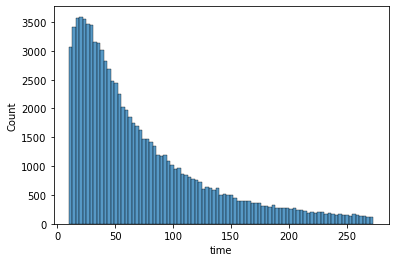

In [24]:
sns.histplot(df_wt["time"])

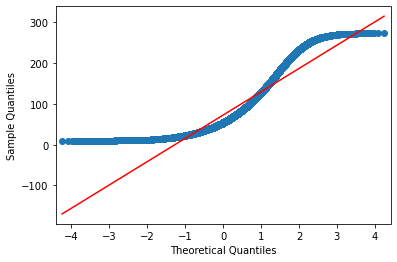

In [25]:
qqplot(df_wt["time"], line="s")
plt.show()